In [1]:
import numpy as np # number array
import pandas as pd # dataframe
import matplotlib.pyplot as plt #plots and graph
import seaborn as sns #plots
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics #evaluate the model 

In [15]:
# DATA COLLECTION AND PROCESSING

In [5]:
gold_data = pd.read_csv('gld_price_data_1.csv')
gold_data.head()#first 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#SPX->also known SNP index it is the capitalization index of 500 companies which are pubilicaly traded.
#It is one of the stocks available.
#GLD->Gold Price (This is what we are planning to predict)
#USO->United States oil price
#SLV->Silver Price
#EUR/USD->Currency (european and us currency)

In [8]:
gold_data.tail()#last 5 rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
#number of rows and coloumns
gold_data.shape

(2290, 6)

In [10]:
#rows->2290
#coloumns->6

In [12]:
gold_data.info() #getting some basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
#there is no missing value
#Data Type are in object and float (64 bits)

In [14]:
gold_data.isnull().sum() #checking the number of missing value

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
#Confirmed that there is no missing value

In [19]:
#Staistical Measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
#count-->2290 data points
#mean-->mean value of each coloumn
#std-->standard deviation
#min and max--> minimum and maximum values
#percentile values-->25% means 25% of the actual data is less than the given value.

In [21]:
#Correlation between Columns of data
# two types
#-->positive corr(two variables one var increases other increases directly proportional)
#-->negative corr(One var increases other one decreases inversly proportional)

In [22]:
correlation=gold_data.corr()

<AxesSubplot:>

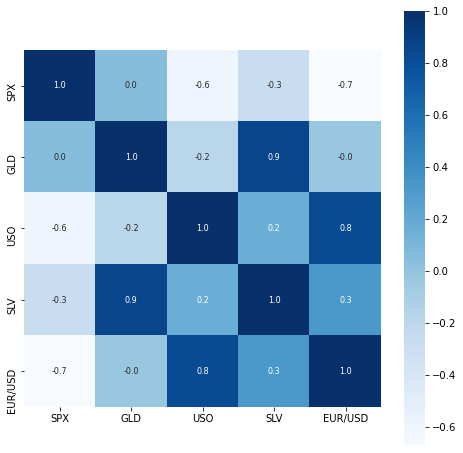

In [25]:
#constructing heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [26]:
#Negative Correlation (1.0 to -0.6)

In [27]:
#cbar=True-->color bar
#square=True --> sqaure shape
#fmt='.1f'-->no. of decimal values we want 1 floating point
#annot=True-->annotations like slv usr etc is needed
#annot_kws={'size':8} -->annotations size
#cmap='Blues'-->which ever color that we need 

In [28]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [29]:
# USO negatively correlated
# SLV positively
# slightly correalated

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

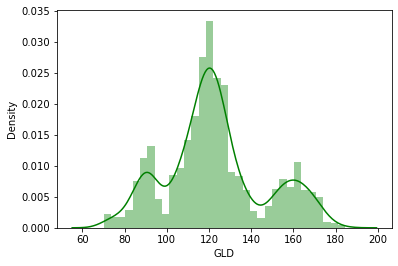

In [61]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

In [31]:
#Splitting the features and target

In [33]:
X=gold_data.drop(['Date','GLD'],axis=1)#axis=1 when coloumn is droped and 0 when row is dropped
Y=gold_data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [36]:
# Splitting into Training data and Test data

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
#Model Training :Random Forest Regression (Mulitiple decisions tree will be there in random forest method.
#It will find voting system it will either find mean  or median value and give prdicted value.)

In [40]:
regressor = RandomForestRegressor(n_estimators=100)

In [42]:
#training the model 
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [43]:
#fit function by this oru ML model will fit

In [44]:
#Model Evaluation

In [45]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [47]:
print(test_data_prediction)

[168.69980026  82.29219982 116.02050022 127.70820074 120.72870136
 154.68329786 149.8309997  126.06660008 117.6011985  126.06700057
 116.47480104 170.79980038 141.75049925 167.98719859 115.23329981
 118.23360049 138.47890305 170.23520087 158.86960271 161.49039881
 155.2309001  124.95820022 176.05379955 157.09810319 125.18320018
  93.7897998   76.83980034 120.60720019 119.10899932 167.53959932
  88.1882003  125.21159984  91.10190086 117.69170031 121.09059923
 135.95300053 115.56590089 115.1974005  145.41920018 106.88290129
 104.20510241  87.24319781 126.65290036 117.65650041 151.40599905
 119.56020008 108.43119987 108.00329804  93.24700051 127.15649775
  74.73820031 113.65159916 121.27080019 111.30269934 118.9357991
 120.59819938 159.77229957 166.87230127 146.95859679  85.85099884
  94.10810029  86.77369895  90.64749989 119.1175005  126.49060061
 127.39099973 169.21269957 122.2740992  117.37879878  98.52280038
 168.59120137 143.43129906 132.62450204 121.12010217 120.4848993
 119.7366005

In [48]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
#real value is Y testand predicted value is in  variable above
print("R squared error : ",error_score)

R squared error :  0.9894519560632793


In [49]:
#range 100 etc error value is very less ie; 0.9894.. so our model is good.

In [50]:
#Compare the actual values and predicted values in a plot

In [51]:
Y_test=list(Y_test)

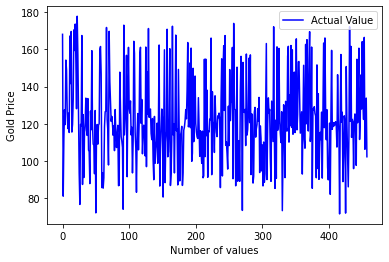

In [59]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

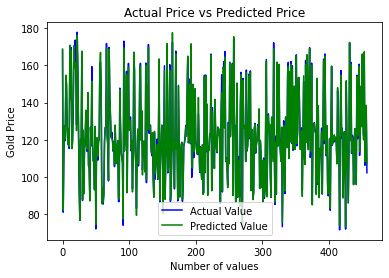

In [62]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [60]:
#actual price is slightly more than predicted because of that error.But the values of actual and predicted are really close.